In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from detectshift.utils import *
from detectshift.exp_utils import *
from detectshift.tests import *
from detectshift.cd_models import *

In [2]:
####### Fixing Seed #######
random_seed=42
np.random.seed(random_seed)
###########################

In [3]:
from scipy.stats import multivariate_normal
class cde_classH0:
    def sample(self,X): 
        p0=multivariate_normal.pdf(X, mean=np.zeros(d), cov=np.diag(np.ones(d)))
        p1=multivariate_normal.pdf(X, mean=np.ones(d), cov=np.diag(np.ones(d)))
        z=p1/(p0+p1)
        return pd.DataFrame(np.random.binomial(1, z))

In [1]:
values = [0] 
d=3

pvals=[]
n_p = 100000
n=200
task='class'
test=.5
B=9

for k in tqdm(range(n_p)):
    for gamma in values:
        for delta in values:

            ### Setting-up data
            Xs, ys, Xt, yt = GenData2(gamma, delta, d=d, n=n)
            Xs_train, Xs_test, ys_train, ys_test, Zs_train, Zs_test, \
            Xt_train, Xt_test, yt_train, yt_test, Zt_train, Zt_test = prep_data(Xs, ys, Xt, yt, test=test, task=task, random_state=random_seed)            
            
            ### Training models
            totshift_model = KL(boost=False, cv=None)
            totshift_model.fit(Zs_train, Zt_train)
            covshift_model = KL(boost=False, cv=None)
            covshift_model.fit(Xs_train, Xt_train)
            cd_model = cde_classH0()

            ### Getting test statistics and p-vals
            out = ShiftDiagnostics(Xs_test, ys_test, Xt_test, yt_test,
                                   totshift_model=totshift_model, covshift_model=covshift_model, labshift_model=None,
                                   cd_model=cd_model, task=task, B=B, verbose=False)

            ### Output
            pvals.append([gamma,delta, out['lab']['pval'], out['cov']['pval'], out['conc1']['pval'], out['conc2']['pval'], out['tot']['pval']])

NameError: name 'tqdm' is not defined

In [5]:
pvals=np.array(pvals)

pvals.shape

(100000, 7)



  ********** Label Shift **********


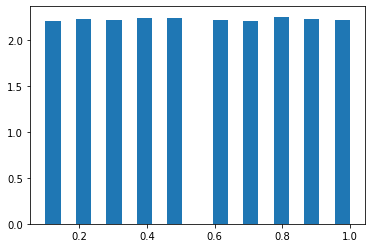

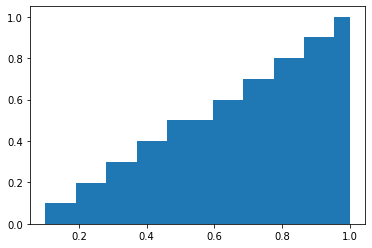



  ********** Cov Shift **********


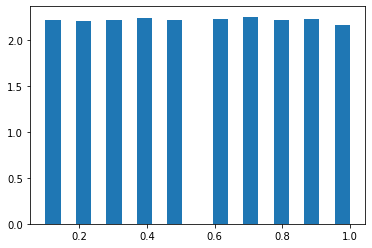

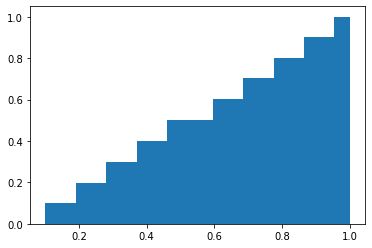



  ********** Concept Shift 1 **********


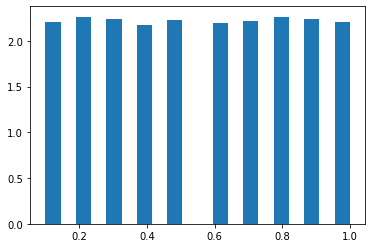

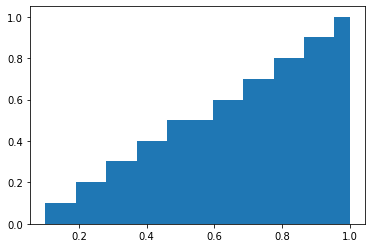



  ********** Concept Shift 2 **********


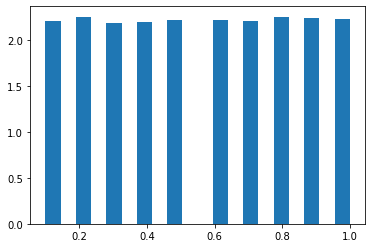

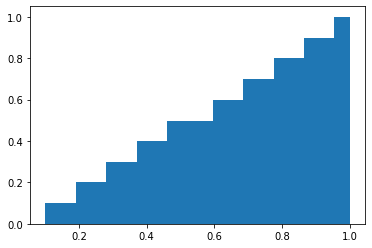



  ********** Total Shift **********


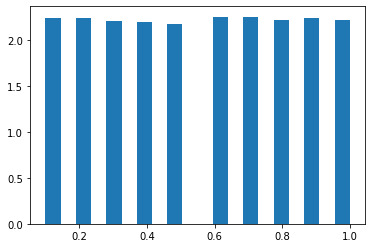

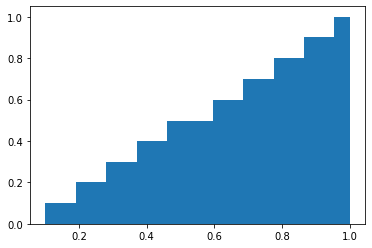

In [6]:
names=['Label Shift', 'Cov Shift', 'Concept Shift 1', 'Concept Shift 2', 'Total Shift']

for i in range(5):
    print("\n\n  **********",names[i],"**********")
    plt.hist(pvals[:,i+2], cumulative=False, density=True, bins=20)
    plt.show()
    plt.hist(pvals[:,i+2], cumulative=True, density=True, bins=20)
    plt.show()